In [235]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

In [237]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SpecID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], prominence=42, width=1)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [238]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

C:\Users\stang\AppData\Local\Temp\ipykernel_18520\2901317241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Widths'] = widths
C:\Users\stang\AppData\Local\Temp\ipykernel_18520\2901317241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Prominences'] = prom


In [239]:
peak_df = peak_df.drop(columns=['Seq', 'SurID'])

In [240]:
peak_df['SpecID'].nunique()

3043

In [241]:
grouped = peak_df.groupby(['SpecID', 'Status'])

In [242]:
grouped.head()

,SpecID,WaveNumber,Absorbance,Status,Widths,Prominences
41,201210-1-00,228.01822,2568.0027,Normal,3.685248,43.5652
55,201210-1-00,237.58542,2533.8584,Normal,5.012100,53.2571
75,201210-1-00,251.25285,2532.9146,Normal,1.691541,49.1543
86,201210-1-00,258.76993,2499.3723,Normal,2.280569,43.8511
236,201210-1-00,361.27563,1871.8003,Normal,1.965821,43.1980
...,...,...,...,...,...,...
8007795,210526-3-49,220.50114,1770.0767,Hyperglycemia,2.503019,44.0534
8007814,210526-3-49,233.48520,1798.8175,Hyperglycemia,2.650706,63.1263
8007824,210526-3-49,240.31891,1786.5729,Hyperglycemia,2.967989,45.2349
8007849,210526-3-49,257.40320,1793.8961,Hyperglycemia,2.455525,53.6595


In [243]:
mean_df = grouped.mean()
max_df = grouped.max()
min_df = grouped.min()
std_df = grouped.std()

In [244]:
df1 = pd.merge(mean_df, max_df, left_index=True, right_index=True)

In [245]:
df2 = pd.merge(min_df, std_df, left_index=True, right_index=True)

In [246]:
avg_df = pd.merge(df1, df2, left_index=True, right_index=True)

In [247]:
avg_df.reset_index(inplace=True)

In [248]:
avg_df['Colour'] = 'orange'

for i, r in avg_df.iterrows():
    if r['Status'] == 'Normal':
        avg_df['Colour'][i] = 'blue'
    elif r['Status'] == 'Hypoglycemia':
        avg_df['Colour'][i] = 'green'

C:\Users\stang\AppData\Local\Temp\ipykernel_18520\2727063375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_df['Colour'][i] = 'blue'
C:\Users\stang\AppData\Local\Temp\ipykernel_18520\2727063375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_df['Colour'][i] = 'blue'
C:\Users\stang\AppData\Local\Temp\ipykernel_18520\2727063375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_df['Colour'][i] = 'blue'
C:\Users\stan

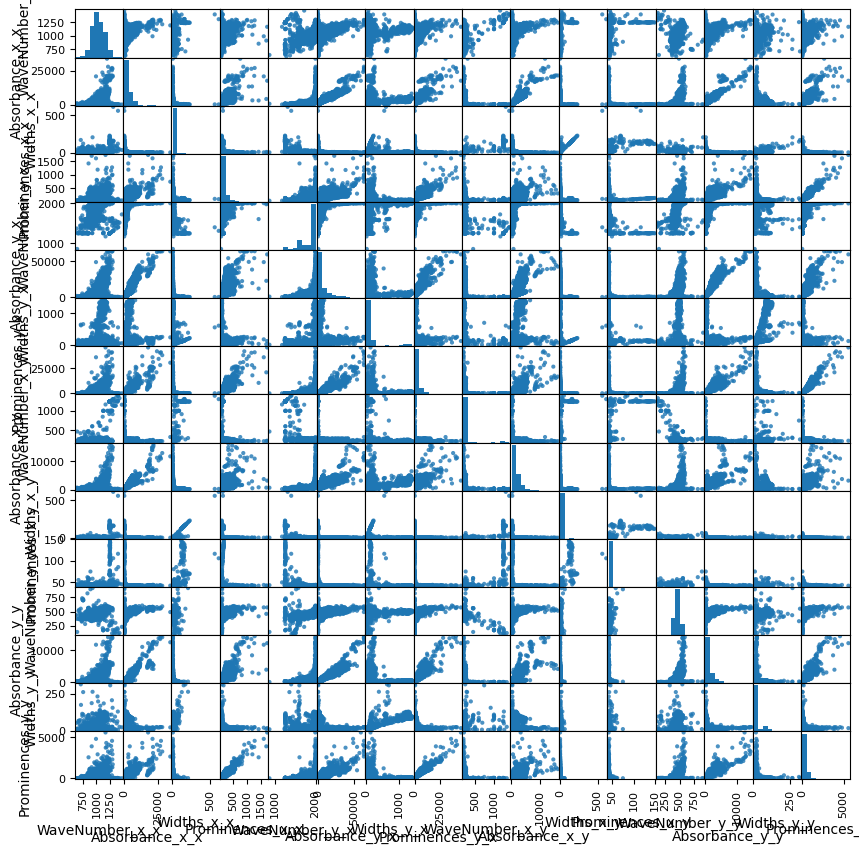

In [249]:
from pandas.plotting import scatter_matrix

scatter_matrix(avg_df, alpha=0.8, figsize=(10, 10), diagonal='hist')

plt.show()


In [250]:
avg_df.head()

,SpecID,Status,WaveNumber_x_x,Absorbance_x_x,Widths_x_x,Prominences_x_x,WaveNumber_y_x,Absorbance_y_x,Widths_y_x,Prominences_y_x,WaveNumber_x_y,Absorbance_x_y,Widths_x_y,Prominences_x_y,WaveNumber_y_y,Absorbance_y_y,Widths_y_y,Prominences_y_y,Colour
0,201210-1-00,Normal,1003.211855,1680.455347,7.361991,60.806342,1840.0911,2568.0027,107.305604,193.5749,228.01822,1207.2180,1.197001,42.0205,451.667842,274.124635,15.883938,30.361845,blue
1,201210-1-01,Normal,1081.979246,1807.833688,6.112966,63.069838,1989.0660,2833.0864,54.616659,219.8550,223.23462,1286.4919,1.084179,42.4069,486.630072,295.927189,8.860502,33.911001,blue
2,201210-1-02,Normal,1123.146042,2260.104434,5.077414,86.714108,1995.8998,3696.4109,36.809791,1762.2488,201.36674,1903.6718,1.009750,42.0528,531.897972,359.616111,6.426342,183.338832,blue
3,201210-1-03,Normal,1140.910754,2742.316266,6.347155,122.911023,1997.2665,10350.5450,74.637545,2220.9512,211.61731,1746.4635,1.173805,42.0374,491.632970,1212.348403,11.046291,279.450780,blue
4,201210-1-04,Normal,1086.791802,2280.106963,6.320154,63.839482,1984.9658,3441.6704,217.370659,446.3222,209.56720,1768.0922,1.036058,42.3919,513.654560,294.013746,19.940231,42.522790,blue


In [251]:
avg_df['coordinates'] = list(zip(avg_df['WaveNumber_x_x'], avg_df['Absorbance_x_x'], avg_df['Widths_x_x'], avg_df['Prominences_x_x'], avg_df['WaveNumber_y_x'], avg_df['Absorbance_y_x'], avg_df['Widths_y_x'], avg_df['Prominences_y_x'], avg_df['WaveNumber_x_y'], avg_df['Absorbance_x_y'], avg_df['Widths_x_y'], avg_df['Prominences_x_y'], avg_df['WaveNumber_y_y'], avg_df['Absorbance_y_y'], avg_df['Widths_y_y'], avg_df['Prominences_y_y']))

In [252]:
nodes = pd.DataFrame({'SpecID':avg_df['SpecID'], 'Status':avg_df['Status'], 'coordinates':avg_df['coordinates']})

In [253]:
nodes.to_csv('../../data/nodes_1_3.csv', index=False)

In [254]:
nodes.rename(columns={'SpecID':'SpecID:ID', 'Status':'Status:LABEL', 'coordinates':'coordinates:array'}, inplace=True)